In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
subrun = 1049
#fileName = "./data/"+str(subrun)+".txt"
#fileName = "./data/output_allCollimators.txt"
#fileName = "./data/output_1000.txt"
fileName = "./data/output_1060_collimators.txt"

In [3]:
previousEntry = -1
colliCounter = 0
with open(fileName, "r") as ins:
    array = []
    for line in ins:
        if("time" in line):
            ding = line.strip().split()
            #print(line)
            #print(ding)
            entry = 0 #int(ding[29])
            if(previousEntry < entry):
                colliCounter = 0
                previousEntry = entry
            dong = [float(ding[3]), float(ding[6]), float(ding[9]), float(ding[12]), 
                    float(ding[15]), float(ding[18]), float(ding[21]), float(ding[24]), str(ding[27]) ]
            if('olli' in ding[27]):
                collimator = int(ding[27].split('Collimator')[1])
                colliCounter += 1
            else:
                collimator = np.nan
            dong.append(collimator)
            dong.append(colliCounter)
            array.append(dong)
            #break

In [4]:
print(dong)

[215.427129, 3582.36689, -5.86760108, -6200.04272, -0.0, -0.0, -0.0, 0.51099891, 'Collimator8', 8, 249]


In [5]:
dffull = pandas.DataFrame(array, columns = [ 'time', 'x', 'y', 'z', 'px', 'py', 'pz', 'E', 
                                             'Location', 'collimator', 'collimatorCollisions'])
dffull['R'] = np.sqrt(dffull['x']**2 + dffull['z']**2)

In [6]:
dffull.head()

,time,x,y,z,px,py,pz,E,Location,collimator,collimatorCollisions,R
0,106.907692,3565.43544,-46.380806,-6163.49575,2672.447690,-9.137058,1526.132630,3079.335100,Collimator8,8,1,7120.464152
1,106.915445,3567.45238,-46.387702,-6162.34351,2665.666850,-11.139306,1528.901590,3074.834560,Collimator8,8,2,7120.477092
2,106.935476,3572.65700,-46.409457,-6159.35545,2662.618560,-28.607058,1519.173380,3067.475740,Collimator8,8,3,7120.501218
3,106.915445,3567.45238,-46.387702,-6162.34351,1.153219,0.981863,1.780826,2.392996,Collimator8,8,4,7120.477092
4,106.916797,3567.65862,-46.221411,-6162.04937,-0.000000,-0.000000,0.000000,0.510999,Collimator8,8,5,7120.325868


In [7]:
entry = 12
df = dffull
#df = dffull.loc[dffull['Location'] == 'xtal[00]']
#df = dffull[dffull['Location'].str.contains('xtal')]
#df = dffull[dffull['entry'] == entry]
df = dffull[dffull['Location'].str.contains('olli')]
#df = dffull[dffull['Location'].str.contains('olli')].loc[dffull['collimatorCollisions'] > 1]
#df = dffull[dffull['Location'].str.contains('alori')]

In [8]:
df.head()

,time,x,y,z,px,py,pz,E,Location,collimator,collimatorCollisions,R
0,106.907692,3565.43544,-46.380806,-6163.49575,2672.447690,-9.137058,1526.132630,3079.335100,Collimator8,8,1,7120.464152
1,106.915445,3567.45238,-46.387702,-6162.34351,2665.666850,-11.139306,1528.901590,3074.834560,Collimator8,8,2,7120.477092
2,106.935476,3572.65700,-46.409457,-6159.35545,2662.618560,-28.607058,1519.173380,3067.475740,Collimator8,8,3,7120.501218
3,106.915445,3567.45238,-46.387702,-6162.34351,1.153219,0.981863,1.780826,2.392996,Collimator8,8,4,7120.477092
4,106.916797,3567.65862,-46.221411,-6162.04937,-0.000000,-0.000000,0.000000,0.510999,Collimator8,8,5,7120.325868


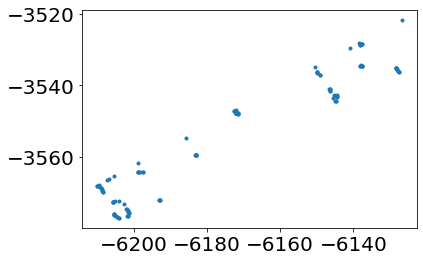

In [9]:
dfi = df.loc[df['collimator'] == 6]#.loc[df['entry'] == 1]
plt.plot(dfi['z'], dfi['x'], ".")
#plt.xlim(-7062,-7064)
#plt.ylim(-1,1)
plt.show()

In [10]:
dfi.head()

,time,x,y,z,px,py,pz,E,Location,collimator,collimatorCollisions,R
9,577.779187,-3565.36368,14.375838,-6205.21672,2680.957940,-4.150057,-1527.379440,3087.329650,Collimator6,6,10,7156.572693
34,172.777260,-3521.80330,-4.662020,-6126.89186,2630.169490,11.733361,-1490.510880,3025.014970,Collimator6,6,35,7066.958493
35,125.570699,-3576.51892,-3.010918,-6201.61857,2675.007830,2.675903,-1545.623430,3091.244010,Collimator6,6,36,7159.019519
36,125.609079,-3566.55754,-3.000958,-6207.36336,2663.017730,-0.572345,-1541.801770,3078.957640,Collimator6,6,37,7159.028745
37,125.570699,-3576.51892,-3.010918,-6201.61857,10.932117,2.495830,-3.668003,11.809137,Collimator6,6,38,7159.019519


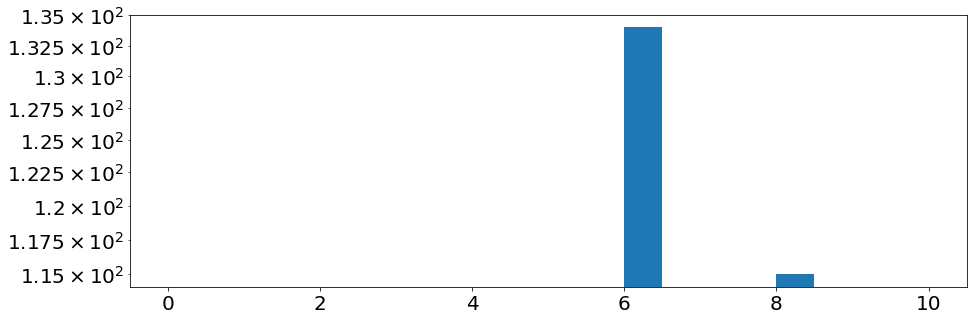

In [11]:
fig,ax = plt.subplots(figsize=(15,5))
plt.hist(df['collimator'], bins=20, range=(0,10))
plt.yscale("log")
plt.show()

In [12]:
collimatorLocations = [ [ i, [0.0,0.0,0.0] ] for i in range(15)]
#print(collimatorLocations)

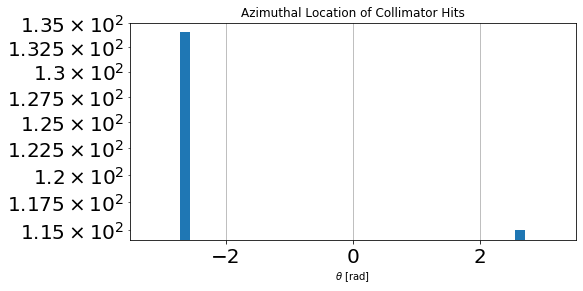

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
plt.title("Azimuthal Location of Collimator Hits")
plt.hist( np.arctan2( df['x'] , df['z'] ) , bins=40, range=(-3.2,3.2))
plt.xlabel(r"$\theta$ [rad]")
plt.yscale("log")
plt.grid()
plt.show()

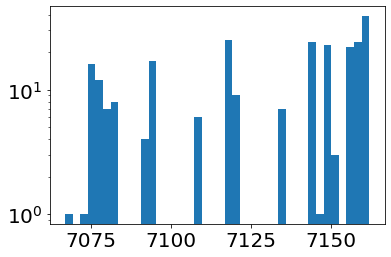

In [14]:
plt.hist( np.sqrt(df['x']**2+ df['z']**2),bins=40)#, range=(6800,7500), bins=40 )
plt.yscale("log")
plt.show()

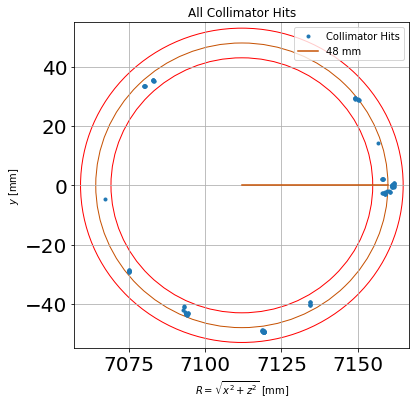

In [15]:
fig,ax = plt.subplots(figsize=(6,6))

plt.plot( np.sqrt(dfi['x']**2+ dfi['z']**2), dfi['y'], ".", label="Collimator Hits")
plt.plot([7112,7112+48], [0,0],label="48 mm", color='xkcd:dark orange')
circle = plt.Circle((7112, 0), 48, color='xkcd:dark orange', fill=False)
ax.add_artist(circle)
circle2 = plt.Circle((7112, 0), 43, color='r', fill=False)
ax.add_artist(circle2)
circle3 = plt.Circle((7112, 0), 53, color='r', fill=False)
ax.add_artist(circle3)
plt.xlim(7112-55, 7112+55)
plt.ylim(-55,55)
plt.title("All Collimator Hits")
plt.xlabel(r"$R = \sqrt{x^2 + z^2}$ [mm]")
plt.ylabel(r"$y$ [mm]")
plt.legend()
plt.grid()
plt.show()

In [16]:
(max(df['y']) - min(df['y']))/2

48.21728815

In [17]:
for collimator in range(len(collimatorLocations)):
    dfi = df.loc[df['collimator'] == collimator]
    #print(len(dfi))
    if(len(dfi) > 0):
        thetas = np.arctan2( dfi['x'] , dfi['z'] )
        #print(thetas)
        #print( thetas.min(), thetas.idxmin() )
        #print(thetas.loc[thetas.idxmin()])
        minColi = dfi.loc[thetas.idxmin()]
        collimatorLocations[collimator][1] = [ minColi['x'] , minColi['y'] , minColi['z'] ]
        #print( np.arctan2( minColi['x'] , minColi['z'] ) )

In [18]:
print(collimatorLocations)

[[0, [0.0, 0.0, 0.0]], [1, [0.0, 0.0, 0.0]], [2, [0.0, 0.0, 0.0]], [3, [0.0, 0.0, 0.0]], [4, [0.0, 0.0, 0.0]], [5, [0.0, 0.0, 0.0]], [6, [-3567.98109, -0.373228666, -6209.92301]], [7, [0.0, 0.0, 0.0]], [8, [3593.26133, -5.2382504, -6193.75637]], [9, [0.0, 0.0, 0.0]], [10, [0.0, 0.0, 0.0]], [11, [0.0, 0.0, 0.0]], [12, [0.0, 0.0, 0.0]], [13, [0.0, 0.0, 0.0]], [14, [0.0, 0.0, 0.0]]]


In [19]:
import sympy as sym
sym.init_printing()
x,y,z = sym.symbols('x,y,z')
c1 = sym.Symbol('c1')
f = sym.Eq(2*x**2+y+z,1)
g = sym.Eq(x+2*y+z,c1)
h = sym.Eq(-2*x+y,-z)

sym.solve([f,g,h],(x,y,z))

In [20]:
import numpy
collCoords = []
for collimator, coords in collimatorLocations:
    if (coords[0] == coords[1] == coords[2]):
        continue
    print('Starting:', collimator)
    initialTheta = np.arctan2( coords[0] , coords[2] )
    newTheta = initialTheta #- 0.0001
    radius = 7112
    print("    ", initialTheta, newTheta)
    
    xi,yi,zi = sym.symbols("x,y,z")
    f1 = sym.Eq( sym.atan2(xi, zi), newTheta )
    f2 = sym.Eq( xi**2 + zi**2, radius**2 )
    
    ding = sym.solve([f1,f2], (x,z))[0]
    print( "    ", ding, ding[0], ding[1])
    collCoords.append( (collimator, (ding[0], ding[1])) )
    print( "    ", sym.atan2( ding[0] , ding[1] ) )

Starting: 6
     -2.6200881730428915 -2.6200881730428915
     (-3543.09308614961, -6166.60647219189) -3543.09308614961 -6166.60647219189
     0.521504480546903 - pi
Starting: 8
     2.615902233847064 2.615902233847064
     (3568.87500935658, -6151.72131745173) 3568.87500935658 -6151.72131745173
     -0.525690419742733 + pi


6 -6166.606 -3543.093
8 -6151.721 3568.875


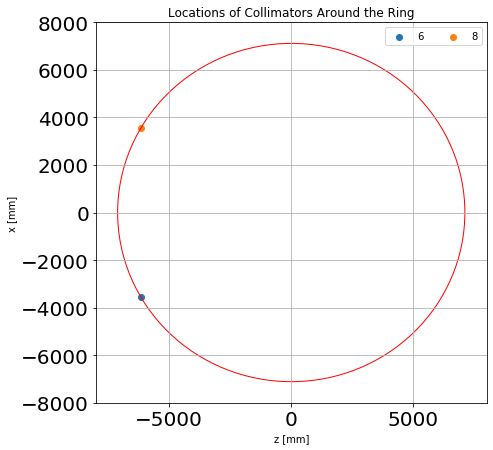

In [21]:
fig,ax = plt.subplots(figsize=(7,7))
colx, coly = zip(*[x[1] for x in collCoords])
circle2 = plt.Circle((0,0), 7112, color='r', fill=False)
ax.add_artist(circle2)
for i, (coli, (x,y)) in enumerate(collCoords):
#plt.scatter(colx, coly)
    print(coli, round(y,3), round(x,3))
    plt.scatter(y,x,label=str(coli))
plt.xlim(-8000,8000)
plt.ylim(-8000,8000)
plt.legend(ncol=3)
plt.title("Locations of Collimators Around the Ring")
plt.xlabel("z [mm]")
plt.ylabel("x [mm]")
plt.grid()
plt.show()

In [22]:
collCoords[0]

In [23]:
def rotate2D( inputVector, angle = 90 ):
    rotMatrix = np.array( [[np.cos(angle), -1*np.sin(angle)], [np.sin(angle), np.cos(angle)]] )
    inputVector = np.array([ float(inputVector[0]), float(inputVector[1]) ])
    #print(rotMatrix, inputVector)
    #print(type(rotMatrix), type(inputVector))
    outputVector = np.matmul(rotMatrix,inputVector)
    print(outputVector)
    
    return outputVector

In [24]:
def getAngleDiff( coord1, coord2 ):
    angle1 = np.arctan2( coord1[0], coord1[1] )
    angle2 = np.arctan2( coord2[0], coord2[1] )
    angleDiff = angle1 - angle2
    print(angle1, angle2, angleDiff)
    return angleDiff

In [25]:
def getAngle( coord1 ):
    return (np.arctan2( coord1[0], coord1[1] ))

In [26]:
getAngle([-1,0])

In [27]:
inputVector = [-1,0]
ding = rotate2D( inputVector, r.TMath.Pi()/50)

[-0.99802673 -0.06279052]


In [28]:
getAngleDiff(inputVector, ding)

-1.5707963267948966 -1.6336281798666925 0.06283185307179595


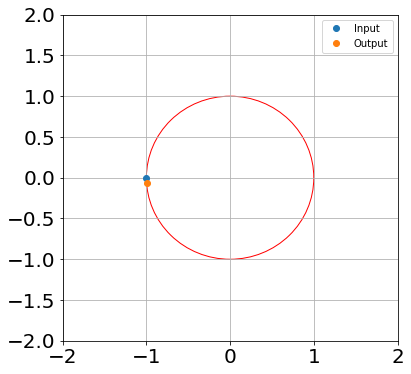

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
circle2 = plt.Circle((0,0), 1, color='r', fill=False)
ax.add_artist(circle2)

plt.plot(inputVector[0], inputVector[1],"o",label='Input')
plt.plot(ding[0], ding[1],"o",label='Output')
#plt.xlim(-7400,7400)
#plt.ylim(-7400,7400)

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.grid()
plt.legend()
plt.show()

In [30]:
a = np.array([[1, 0],
              [0, 1]])
b = np.array([1, 2])

angle = 90
inputVector = collCoords[0][1]
a = np.array( [[np.cos(angle), -1*np.sin(angle)], [np.sin(angle), np.cos(angle)]] )
b = np.array([ float(inputVector[0]), float(inputVector[1]) ])
print(type(b))


print(a,b)
print( np.matmul(a, b) )

print( np.matmul(b, a) )

<class 'numpy.ndarray'>
[[-0.44807362 -0.89399666]
 [ 0.89399666 -0.44807362]] [-3543.09308615 -6166.60647219]
[7100.49214327 -404.4197366 ]
[-3925.35908048  5930.60705908]


In [31]:
print(collCoords)

[(6, (-3543.09308614961, -6166.60647219189)), (8, (3568.87500935658, -6151.72131745173))]


In [32]:
for x in collCoords:
    anglei = np.arctan2(float(x[1][0]), float(x[1][1]))
    print(anglei)

-2.6200881730428898
2.61590223384706


In [33]:
initialVector = [0, 7112]
directions = []
for x in collCoords:
    print(x)
    anglei = getAngleDiff( initialVector, [float(x[1][0]), float(x[1][1])] )
    ding = rotate2D( inputVector, anglei )
    directions.append( [ding[0], 0, ding[1]] )

(6, (-3543.09308614961, -6166.60647219189))
0.0 -2.6200881730428898 2.6200881730428898
[6144.22405979 3581.76698056]
(8, (3568.87500935658, -6151.72131745173))
0.0 2.61590223384706 -2.61590223384706
[ -29.77031262 7111.93769155]


In [34]:
for loc, x in zip(collCoords, directions):
    print([loc[0], 0, loc[1]])
    print(x)
    print()

[6, 0, (-3543.09308614961, -6166.60647219189)]
[6144.224059794287, 0, 3581.766980562108]

[8, 0, (3568.87500935658, -6151.72131745173)]
[-29.770312620896675, 0, 7111.937691549783]



---

### Now lets go through and, for each of the run1 collimators, determine the offset we would need

In [35]:
np.sqrt(float(coords[0]**2 + coords[1]**2))

[-6157.31970152  3559.20750916]
[0.50181032 0.86497769]
[0.500451   0.86576486]
x,z coordinates of collimator: [-6151.72131745173, 3568.87500935658]
rotating by angle: 0.0015707963267948967
output coordintes: [-6157.31970152  3559.20750916]
collimator angle: 2.61590223384706
momentum at angle 2.61590223384706 is: [0.50181032 0.86497769]
momentum at rotated angle: [0.500451   0.86576486]


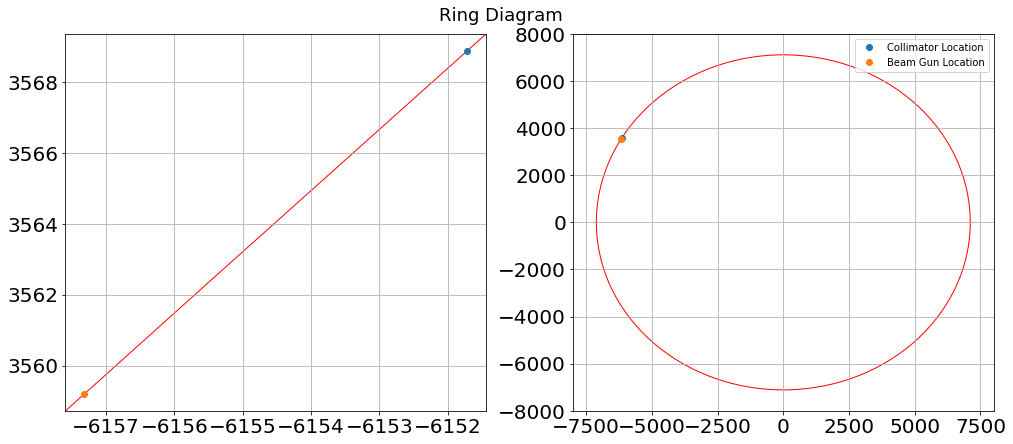

// Collimator 8 corner locations in ring (x,y,z),  47  mm from magic 7112 mm; 0.00157 radians behind collimator location
services.TheBeam.dir : [ 0.86576486241865 , 0 , 0.5004509996005763 ] 	 	 	 // collimator 8
services.TheBeam.pos : [ 3542.575511272248 , 33.23401871576773 , -6128.546855880363 ]	  	 // inner top collimator 8
//services.TheBeam.pos : [ 3542.575511272248 , -33.23401871576773 , -6128.546855880363 ]	 	 // inner bottom collimator 8
//services.TheBeam.pos : [ 3575.8395070463484 , 33.23401871576773 , -6186.092547162513 ]	 	 // outer top collimator 8
//services.TheBeam.pos : [ 3575.8395070463484 , -33.23401871576773 , -6186.092547162513 ]	 // outer bottom collimator 8


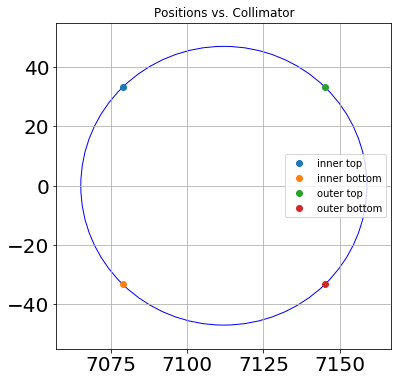

In [36]:
angleBehind = math.pi/2000
collimator = 8

for coli, x in collCoords:
    if(coli == collimator):
        coords = [x[1], x[0]] #x-z coordinates mean that x is taking the place of y here
        break

rotCoords = rotate2D(coords, angleBehind)
    
#now lets figure out the momentum. At (0,7112) -> (-1,0)
angle = getAngle([float(coords[1]), float(coords[0])])
momAtAngle = rotate2D([0,-1], angle)

rotAngle = getAngle([float(rotCoords[1]), float(rotCoords[0])])
momAtRotAngle = rotate2D([0,-1], rotAngle)

doplot = True

if(doplot):
    print("x,z coordinates of collimator:", coords)
    print("rotating by angle:", angleBehind)
    print("output coordintes:", rotCoords)

    print("collimator angle:", angle)
    print("momentum at angle", angle, "is:", momAtAngle)
    print("momentum at rotated angle:", momAtRotAngle)

    fig, ax = plt.subplots(1,2,figsize=(14,6))
    circle2 = plt.Circle((0,0), 7112, color='r', fill=False)
    ax[0].add_artist(circle2)
    circle3 = plt.Circle((0,0), 7112, color='r', fill=False)
    ax[1].add_artist(circle3)
    for axi in ax:
        axi.plot(coords[0], coords[1],"o",label='Collimator Location')
        axi.plot(rotCoords[0], rotCoords[1],"o",label='Beam Gun Location')
        axi.grid()
        
    plt.suptitle("Ring Diagram",y=1.02, fontsize=18)
    #plt.xlim(-7400,7400)
    #plt.ylim(-7400,7400)

    plt.xlim(-8000,8000)
    plt.ylim(-8000,8000)

    plt.legend()
    plt.tight_layout()
    plt.show()

#now lets figure out the positions of the beam for collimators, hitting the upper left/right corners
collimatorRadius = 47 # mm
colx = collimatorRadius/np.sqrt(2)
coly = collimatorRadius/np.sqrt(2)

coordy = coly
coordx = rotCoords[1] - colx*np.cos(getAngle(rotCoords))
coordz = rotCoords[0] - colx*np.sin(getAngle(rotCoords))

if(doplot):
    fig,ax = plt.subplots(figsize=(6,6))
    circle2 = plt.Circle((7112,0), collimatorRadius, color='b', fill=False)
    ax.add_artist(circle2)

print("// Collimator", collimator,"corner locations in ring (x,y,z), ", collimatorRadius," mm from magic 7112 mm;", 
      round(angleBehind,5), "radians behind collimator location")
#print(rotCoords[1], 0, rotCoords[0])
#print(colx*np.sin(getAngle(rotCoords)), colx*np.cos(getAngle(rotCoords)))
print('services.TheBeam.dir : [', momAtRotAngle[1] , ",", 0,",", momAtRotAngle[0],"] \t \t \t // collimator", collimator)
print('services.TheBeam.pos : [', coordx, ",", coordy,",", coordz,"]\t  \t // inner top collimator", collimator)
print('//services.TheBeam.pos : [', coordx, ",", -1*coordy,",", coordz,"]\t \t // inner bottom collimator", collimator)

if(doplot):
    plt.plot([math.sqrt(coordx**2 + coordz**2)], [coordy], "o", label="inner top")
    plt.plot([math.sqrt(coordx**2 + coordz**2)], [-coordy], "o", label="inner bottom")

coordy = coly
coordx = rotCoords[1] + colx*np.cos(getAngle(rotCoords))
coordz = rotCoords[0] + colx*np.sin(getAngle(rotCoords))
print('//services.TheBeam.pos : [', coordx, ",", coordy,",", coordz,"]\t \t // outer top collimator", collimator)
print('//services.TheBeam.pos : [', coordx, ",", -1*coordy,",", coordz,"]\t // outer bottom collimator", collimator)

if(doplot):
    plt.plot([math.sqrt(coordx**2 + coordz**2)], [coordy], "o", label="outer top")
    plt.plot([math.sqrt(coordx**2 + coordz**2)], [-coordy], "o", label="outer bottom")
    
    plt.ylim(-55,55)
    plt.xlim(7112-55,7112+55)
    plt.grid()
    plt.title("Positions vs. Collimator")
    plt.legend()
    plt.show()

In [47]:
angleBehind = math.pi/2000
collimator = 8

for coli, x in collCoords:
    if(coli == collimator):
        coords = [x[1], x[0]] #x-z coordinates mean that x is taking the place of y here
        break

rotCoords = rotate2D(coords, angleBehind)
    
#now lets figure out the momentum. At (0,7112) -> (-1,0)
angle = getAngle([float(coords[1]), float(coords[0])])
momAtAngle = rotate2D([0,-1], angle)

rotAngle = getAngle([float(rotCoords[1]), float(rotCoords[0])])
momAtRotAngle = rotate2D([0,-1], rotAngle)

doplot = False

if(doplot):
    print("x,z coordinates of collimator:", coords)
    print("rotating by angle:", angleBehind)
    print("output coordintes:", rotCoords)

    print("collimator angle:", angle)
    print("momentum at angle", angle, "is:", momAtAngle)
    print("momentum at rotated angle:", momAtRotAngle)

    fig, ax = plt.subplots(1,2,figsize=(14,6))
    circle2 = plt.Circle((0,0), 7112, color='r', fill=False)
    ax[0].add_artist(circle2)
    circle3 = plt.Circle((0,0), 7112, color='r', fill=False)
    ax[1].add_artist(circle3)
    for axi in ax:
        axi.plot(coords[0], coords[1],"o",label='Collimator Location')
        axi.plot(rotCoords[0], rotCoords[1],"o",label='Beam Gun Location')
        axi.grid()
        
    plt.suptitle("Ring Diagram",y=1.02, fontsize=18)
    #plt.xlim(-7400,7400)
    #plt.ylim(-7400,7400)

    plt.xlim(-8000,8000)
    plt.ylim(-8000,8000)

    plt.legend()
    plt.tight_layout()
    plt.show()

#now lets figure out the positions of the beam for collimators, hitting the upper left/right corners
collimatorRadius = 47 # mm
npoints = 100

if(doplot):
    fig,ax = plt.subplots(figsize=(6,6))
    circle2 = plt.Circle((7112,0), collimatorRadius, color='b', fill=False, linewidth=5)
    ax.add_artist(circle2)

print("// Collimator", collimator,"corner locations in ring (x,y,z), ", collimatorRadius," mm from magic 7112 mm;", 
      round(angleBehind,5), "radians behind collimator location")
#print(rotCoords[1], 0, rotCoords[0])
#print(colx*np.sin(getAngle(rotCoords)), colx*np.cos(getAngle(rotCoords)))
print('services.TheBeam.dir : [', momAtRotAngle[1] , ",", 0,",", momAtRotAngle[0],"] \t \t \t // collimator", collimator)

for angle in np.linspace(0,2*math.pi,npoints):

    colx = collimatorRadius*math.sin(angle)
    coly = collimatorRadius*math.cos(angle)

    coordy = coly
    coordx = rotCoords[1] - colx*np.cos(getAngle(rotCoords))
    coordz = rotCoords[0] - colx*np.sin(getAngle(rotCoords))

    print('services.TheBeam.pos : [', coordx, ",", coordy,",", coordz,"]\t  \t // angle", round(angle,4), " rad /  collimator", collimator)

    if(doplot):
        plt.plot([math.sqrt(coordx**2 + coordz**2)], [coordy], "o", label="")


if(doplot):
    plt.ylim(-55,55)
    plt.xlim(7112-55,7112+55)
    plt.grid()
    plt.title("Positions vs. Collimator")
    #plt.legend()
    plt.show()

[-6157.31970152  3559.20750916]
[0.50181032 0.86497769]
[0.500451   0.86576486]
// Collimator 8 corner locations in ring (x,y,z),  47  mm from magic 7112 mm; 0.00157 radians behind collimator location
services.TheBeam.dir : [ 0.86576486241865 , 0 , 0.5004509996005763 ] 	 	 	 // collimator 8
services.TheBeam.pos : [ 3559.2075091592983 , 47.0 , -6157.319701521438 ]	  	 // angle 0.0  rad /  collimator 8
services.TheBeam.pos : [ 3557.715702651735 , 46.905373794178566 , -6154.738922070889 ]	  	 // angle 0.0635  rad /  collimator 8
services.TheBeam.pos : [ 3556.2299031224534 , 46.62187620304738 , -6152.168534508317 ]	  	 // angle 0.1269  rad /  collimator 8
services.TheBeam.pos : [ 3554.7560933617547 , 46.150648771347214 , -6149.618888877235 ]	  	 // angle 0.1904  rad /  collimator 8
services.TheBeam.pos : [ 3553.3002078813734 , 45.493588965628746 , -6147.100251700716 ]	  	 // angle 0.2539  rad /  collimator 8
services.TheBeam.pos : [ 3551.868109018293 , 44.653342533824436 , -6144.6227646417

In [37]:
np.sqrt((rotCoords**2).sum())

In [38]:
ding = math.sqrt(coordx**2 + coordz**2) - 7112
print(ding)

33.23401871576698


In [39]:
np.sqrt(2*ding**2 )